### Notebook para estudo do curso Intro to Tensorflow for Deep Learning da Udacity

Como primeiro exercício criaremos um modelo de machine learning com tensorflow que aprende a converter celsius para Farenheint a partir de alguns exemplos.

A fórmula é:

$$ f = c \times 1.8 + 32 $$


Primeiro vamos importar o tensorflow.

In [2]:
import tensorflow as tf

2023-01-16 21:06:55.876479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 21:06:59.856855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 21:06:59.856909: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 21:07:07.053434: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Agora vamos preparar os dados de treino (uma pequena lista de temperaturas em celsius e Farenheint):


In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} graus Celsius = {} graus Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 graus Celsius = -40.0 graus Fahrenheit
-10.0 graus Celsius = 14.0 graus Fahrenheit
0.0 graus Celsius = 32.0 graus Fahrenheit
8.0 graus Celsius = 46.0 graus Fahrenheit
15.0 graus Celsius = 59.0 graus Fahrenheit
22.0 graus Celsius = 72.0 graus Fahrenheit
38.0 graus Celsius = 100.0 graus Fahrenheit


O próximo passo é criar uma camada. Um tipo de neurônio ( e de camada de neurônios) é a Dense ( que simplesmente conecta todos os nós da camada anterior).

O input shape diz qual o formato de entrada: nesse caso um array de 1 dimensão com um único elemento. E a quantidade de neurônios é dada por "units".

In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) # camada zero, para fins didáticos

O modelo usará o framework Sequential, que simplesmente liga os neurônios na ordem passada em uma lista, sequencialmente.

In [6]:
model = tf.keras.Sequential([l0]) # passando a camada l0 para o modelo, que implementa o framework Sequential 

2023-01-16 21:11:51.080843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-16 21:11:51.090293: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-16 21:11:51.090353: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edu-VJFE42F11X-XXXXXX): /proc/driver/nvidia/version does not exist
2023-01-16 21:11:51.142594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Agora precisamos compilar o modelo. Para isso precisamos saber duas coisas. A primeira é uma forma de medir o quanto o modelo está acertando ou errando, de modo que durante o aprendizado ele seja capaz de identificar se precisa ir pelo caminhio que foi ou se precisa tentar outro caminho. Isso é dado pela função de perda, ou loss function. 

A outra coisa que precisamos saber é qual o otimizador. O otimizador é uma função que decide qual direção tomar de modo a reduzir a função de perda.

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1)) # o otimizador é Adam, e a função de perda é o MSE. O 0.1 se refere ao learning_rate, que é a taxa de aprendizado

Para treinar o modelo usando o método fit. Enquanto a compilação cria a estrutura da rede neural, o método fit recebe as entradas, as saídas, o jeito de saber se acertou ou error ( a loss function ) e o otimizador. Com isso, o tensorflow modifica os pesos dos neurônios (na estrutura compilada) de forma a reduzir a loss function.

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False) # o número de épocas é quantas vezes o processo todo que o otimizador tenta reduzir a loss function acontece
print("Modelo treinado com sucesso")

Modelo treinado com sucesso


Vamos ver como foi o treino. Para isso vamos avaliar o history da loss function pra ver como ela evoluiu durante o treino.

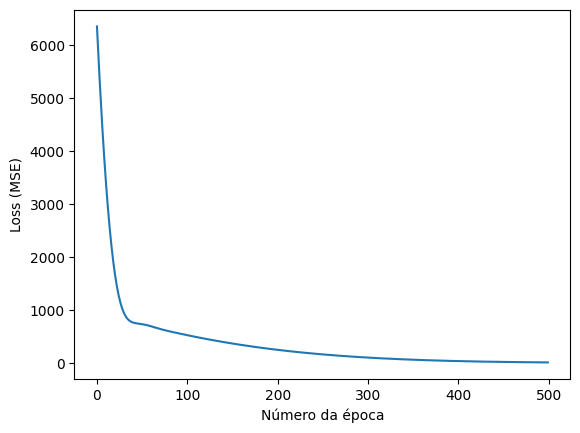

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Número da época')
plt.ylabel("Loss (MSE)")
plt.plot(history.history['loss'])

Para ver se nosso modelo acertou vamos fazer uma pequena função que converte Celsius para Farenheint **sabendo** da fórmula. Após isso testaremos as previsões do nosso modelo que **não conhece a fórmula previamente** e sim que aprendeu pelos casos passados para treinar.

In [14]:
def c_to_F(C):
    ''' converte uma temperatura de Celsius para Farenheint'''
    F = C * 1.8 + 32
    return F

In [16]:
temperaturas = [100, 50, 0, 150, 36.5]

for t in temperaturas:
    print(t, 'graus C fica')
    print('pela fórmula ',c_to_F(t), 'graus F')
    print('pelo modelo', model.predict([t]))

100 graus C fica
pela fórmula  212.0 graus F
1/1 [==============================] - 0s 204ms/step
pelo modelo [[211.29062]]
50 graus C fica
pela fórmula  122.0 graus F
1/1 [==============================] - 0s 35ms/step
pelo modelo [[119.942696]]
0 graus C fica
pela fórmula  32.0 graus F
1/1 [==============================] - 0s 35ms/step
pelo modelo [[28.59478]]
150 graus C fica
pela fórmula  302.0 graus F
1/1 [==============================] - 0s 37ms/step
pelo modelo [[302.63852]]
36.5 graus C fica
pela fórmula  97.7 graus F
1/1 [==============================] - 0s 58ms/step
pelo modelo [[95.278755]]


O modelo acerta até que bem.

Os pesos encontrados são:

In [17]:
print("Pesos: {}".format(l0.get_weights()))

Pesos: [array([[1.8269583]], dtype=float32), array([28.59478], dtype=float32)]


O primeiro valor tem o 1.8 da fórmula, e o segundo 28.5 (perto dos 32). 

Se porém criarmos um modelo com muitas camadas então esses pesos ficam espalhados:

In [19]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Modelo treinado.")
print(model.predict([100.0]))
print("o modelo prediz que 100 graus Celsius = {} graus Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Modelo treinado.
1/1 [==============================] - 0s 64ms/step
[[211.74745]]
1/1 [==============================] - 0s 38ms/step
o modelo prediz que 100 graus Celsius = [[211.74745]] graus Fahrenheit
These are the l0 variables: [array([[-0.3243924 , -0.22467528,  0.4695681 ,  0.0024241 ]],
      dtype=float32), array([-3.092373  , -3.0527852 ,  3.1429803 , -0.27978337], dtype=float32)]
These are the l1 variables: [array([[-0.4579998 ,  0.08927165, -1.0103703 , -0.9964259 ],
       [-0.18925792,  0.345951  , -1.1809263 , -0.97324   ],
       [-0.41002396, -0.07075675,  0.6511522 ,  0.27088553],
       [-0.83431923, -0.9331386 , -0.34044498, -0.46981564]],
      dtype=float32), array([ 2.0827773, -2.921048 ,  3.1420069,  3.1101878], dtype=float32)]
These are the l2 variables: [array([[ 0.27390286],
       [-1.1428149 ],
       [ 0.99764127],
       [ 1.1086389 ]], dtype=float32), array([3.0758154], dtype=float32)]
